In [3]:
import pandas as pd
df= pd.read_csv('C:\DS&AI\Vimala\Python\statistical Modelling and Inference\dataset\heart_failure_clinical_records_dataset.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='sex'>

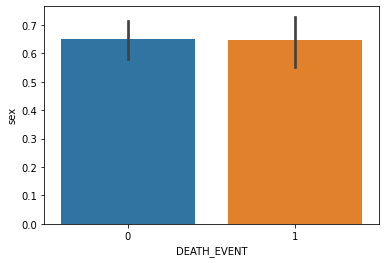

In [46]:
sns.barplot(data=df,y='sex',x='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

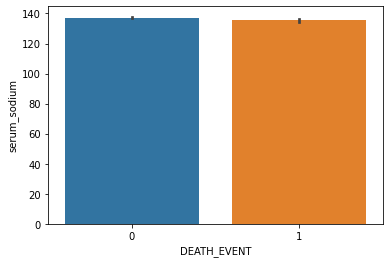

In [45]:
sns.barplot(data=df,y='serum_sodium',x='DEATH_EVENT')

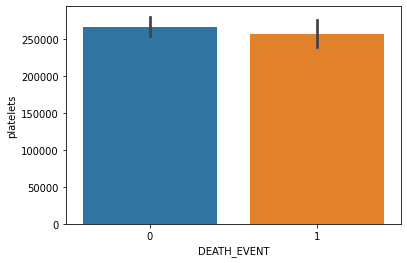

In [42]:
import seaborn as sns
sns.barplot(data=df,y='platelets',x='DEATH_EVENT')
import matplotlib.pyplot as plt

#sns.barplot()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

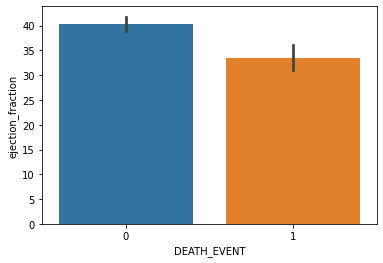

In [44]:
sns.barplot(data=df,y='ejection_fraction',x='DEATH_EVENT')

In [ ]:
sns.barplot(data=df,y='creatinine_phosphokinase',x='DEATH_EVENT')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<h3><b>There are 12 columns. All of them are numerical and there are no NaN values

There are no duplicates

Dependent Variable = Death_event

Other columns are independent variable

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

<h3><b>The dependent column is a categorical variable : Predicts if a patient is at risk in developing heart disease 
<br>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

<h4><b>
creatinine_phosphokinase:
10 to 120 micrograms per liter (mcg/L) - Normal - 0
Otherwise abnormal -1

ejection_fraction:
normal heart’s ejection fraction may be between 50 and 70 percent.
under 40 percent may be evidence of heart failure
41 to 49 percent may be considered “borderline.”

platelets:
For women, the average platelet count is between 157,000 and 371,000 per microliter of blood. For men, the average is between 135,000 and 317,000 per microliter of blood.

serum_sodium:
135 to 145 mEq/L normal
otherwise abnormal


In [8]:
df[df.creatinine_phosphokinase<10].shape

(0, 13)

In [9]:
import copy
df1 = copy.copy(df)
df1.loc[(df.creatinine_phosphokinase < 120), 'creatinine_phosphokinase'] = 0
df1.loc[(df.creatinine_phosphokinase > 120), 'creatinine_phosphokinase'] = 1

In [10]:
df1.loc[((df.platelets > 135000 )& (df.platelets <371000) & (df.sex==0)),'platelets']=0


In [11]:
#df1.loc[((df.platelets >371000)& df.platelets<135000),'platelets']=1
df1.loc[((df.platelets > 135000 )& (df.platelets <371000) & (df.sex==1)),'platelets']=0


In [12]:
df1.loc[((df1.platelets !=0)),'platelets']=1

In [13]:
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,1,0,20,1,0.0,1.9,130,1,0,4,1
1,55.0,0,1,0,38,0,0.0,1.1,136,1,0,6,1
2,65.0,0,1,0,20,0,0.0,1.3,129,1,1,7,1
3,50.0,1,0,0,20,0,0.0,1.9,137,1,0,7,1
4,65.0,1,1,1,20,0,0.0,2.7,116,0,0,8,1


In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df1.platelets.unique()


array([0., 1.])

In [50]:
df1.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

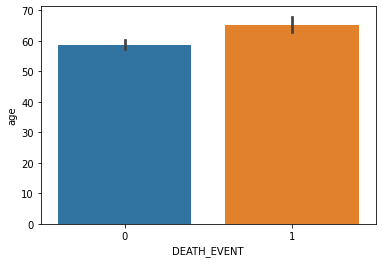

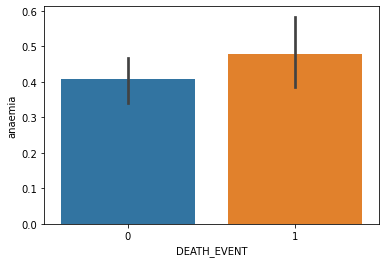

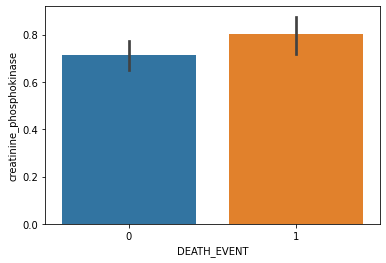

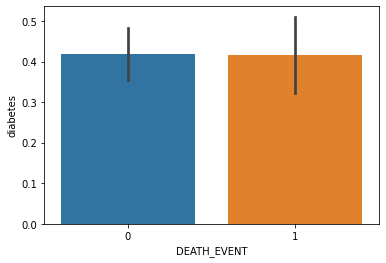

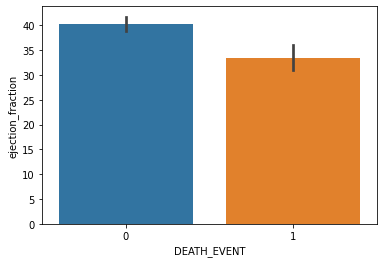

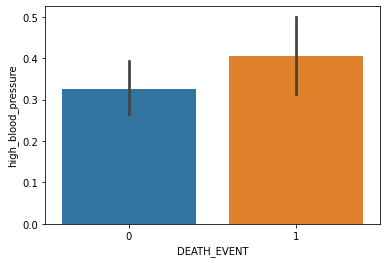

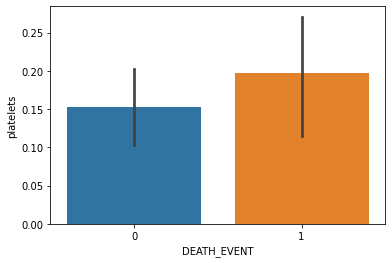

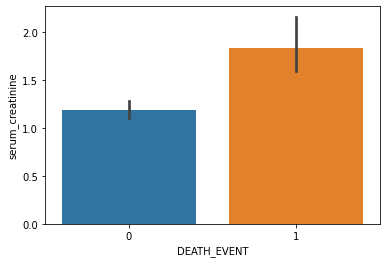

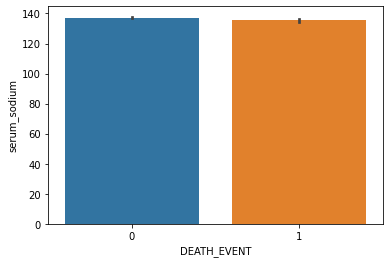

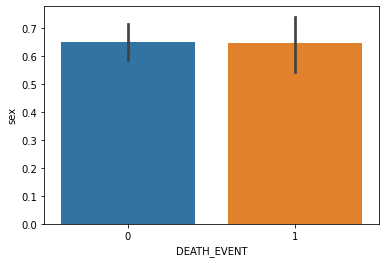

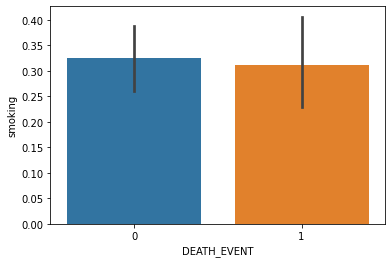

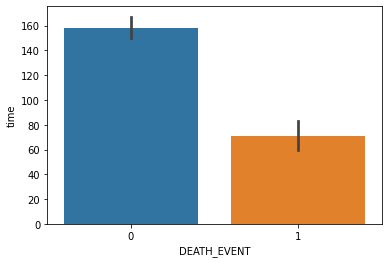

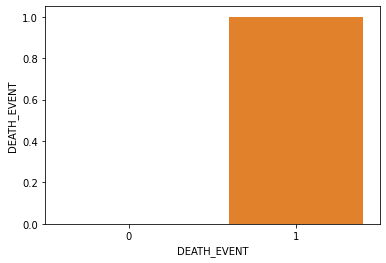

In [51]:
for i in df1.columns:
    sns.barplot(data=df1,y=i,x='DEATH_EVENT')
    plt.show()

In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def logsitic_reg(df):
    regr_model=LogisticRegression(max_iter=500)
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    print(regr_model.coef_)
    import matplotlib.pyplot as plt

    labels =['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print('accuracy:',acc)
    print(cm)
    print(report)  

features Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (299, 13) (239, 12) (60, 12) (239, 1) (60, 1)
[[ 5.22806537e-02  8.18507152e-04  3.76535344e-04  5.81382129e-05
  -7.40653376e-02 -2.56543323e-04 -1.17232490e-06  8.36398113e-03
   7.90213515e-03 -5.31698385e-04 -5.17704258e-04 -2.10405280e-02]]


<ipython-input-36-78ca01aa4b21>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-36-78ca01aa4b21>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


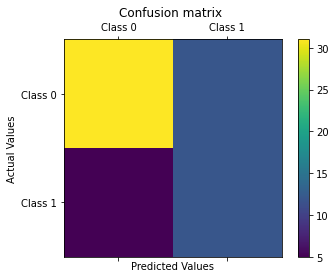

accuracy: 0.7166666666666667
[[31 12]
 [ 5 12]]
              precision    recall  f1-score   support

           0      0.721     0.861     0.785        36
           1      0.706     0.500     0.585        24

    accuracy                          0.717        60
   macro avg      0.713     0.681     0.685        60
weighted avg      0.715     0.717     0.705        60



In [37]:
logsitic_reg(df)

features Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (299, 13) (239, 12) (60, 12) (239, 1) (60, 1)
ERROR! Session/line number was not unique in database. History logging moved to new session 627


<ipython-input-16-f65720c7127d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-f65720c7127d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


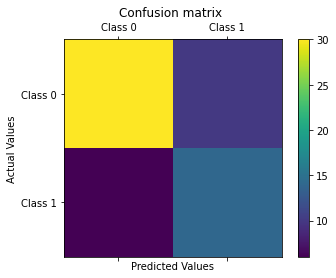

accuracy: 0.7333333333333333
[[30 10]
 [ 6 14]]
              precision    recall  f1-score   support

           0      0.750     0.833     0.789        36
           1      0.700     0.583     0.636        24

    accuracy                          0.733        60
   macro avg      0.725     0.708     0.713        60
weighted avg      0.730     0.733     0.728        60



In [34]:
logsitic_reg(df1)

In [19]:
df3=df1[['serum_creatinine','ejection_fraction','DEATH_EVENT']]

In [20]:
df4=df.drop('time', axis=1)

In [21]:
df5=df1.drop('time',axis=1)

features Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (299, 12) (239, 11) (60, 11) (239, 1) (60, 1)


<ipython-input-16-f65720c7127d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-f65720c7127d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


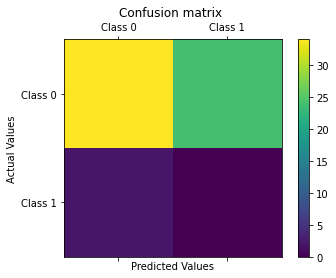

accuracy: 0.5666666666666667
[[34 24]
 [ 2  0]]
              precision    recall  f1-score   support

           0      0.586     0.944     0.723        36
           1      0.000     0.000     0.000        24

    accuracy                          0.567        60
   macro avg      0.293     0.472     0.362        60
weighted avg      0.352     0.567     0.434        60



In [22]:
logsitic_reg(df4)

features Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (299, 12) (239, 11) (60, 11) (239, 1) (60, 1)


<ipython-input-16-f65720c7127d>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-f65720c7127d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


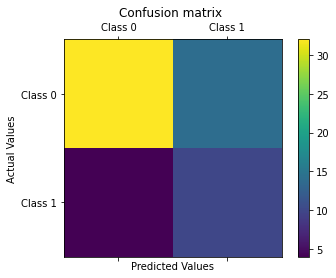

accuracy: 0.7
[[32 14]
 [ 4 10]]
              precision    recall  f1-score   support

           0      0.696     0.889     0.780        36
           1      0.714     0.417     0.526        24

    accuracy                          0.700        60
   macro avg      0.705     0.653     0.653        60
weighted avg      0.703     0.700     0.679        60



In [23]:
logsitic_reg(df5)

In [24]:
# Spot Check Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
models = []
#regr_model=LogisticRegression(max_iter=500)
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LR-liblinar', LogisticRegression(solver='liblinear', multi_class='ovr',max_iter=10000)))
models.append(('LR-sag', LogisticRegression(solver='sag', multi_class='ovr',max_iter=10000)))
models.append(('LR-saga', LogisticRegression(solver='saga', multi_class='ovr',max_iter=10000)))
#models.append(('LR-newton-cg', LogisticRegression(solver='newton-cg', multi_class='ovr',max_iter=500)))
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()),sep='\n')

LR: 0.849638 (0.081361)
LR-liblinar: 0.845471 (0.074315)
LR-sag: 0.702899 (0.029234)
LR-saga: 0.702899 (0.012655)
LDA: 0.866304 (0.040393)
KNN: 0.664855 (0.067068)
CART: 0.790761 (0.064607)
NB: 0.803442 (0.064393)
SVM: 0.698732 (0.016466)


In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [26]:
import statsmodels.formula.api as smf
model = smf.logit("DEATH_EVENT ~ serum_sodium + ejection_fraction ", data=df)

In [27]:
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.577090
         Iterations 6


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                 0.08059
Time:                        00:40:30   Log-Likelihood:                -172.55
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 2.701e-07
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.9123      4.204      2.834      0.005       3.673      20.152
serum_sodium         -0.0790      0.031     -2.549      0.011      -0.140      -0.018
ejection_fraction    -0.0516      0.013     -4.065      0.000      -0.077      -0.027
=====================================================================================
"""

2.701e-07 is almost zero which means our model is good.

In [32]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='serum_sodium', ylabel='DEATH_EVENT'>

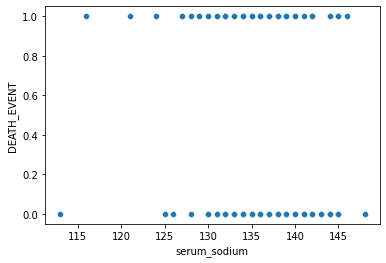

In [33]:
import seaborn as sns
sns.scatterplot(data=df,x='serum_sodium',y='DEATH_EVENT')